In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import datasets, layers, models, optimizers, regularizers, callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [3]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
training_set = train_datagen.flow_from_directory(r'C:\Users\Hrushikesh\OneDrive\Desktop\Detection of Retinal pigmentosa in paediatric age patients using CNN with Tkinter Framework\Retinal_Pigmentosa_model\pupilometry\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\Hrushikesh\OneDrive\Desktop\Detection of Retinal pigmentosa in paediatric age patients using CNN with Tkinter Framework\Retinal_Pigmentosa_model\pupilometry\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 520 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [6]:
#classifier.fit_generator(training_set, steps_per_epoch=None, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)

In [7]:
# Loading the model, since training the new_model takes a lot of time, we have trained it earleir and saved the model.
my_model = tf.keras.models.load_model(r'C:\Users\Hrushikesh\OneDrive\Desktop\Detection of Retinal pigmentosa in paediatric age patients using CNN with Tkinter Framework\Retinal_Pigmentosa_model\model\weights-best-01-0.74.hdf5')

In [8]:
import PIL
print(PIL.__version__)


10.4.0


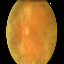

In [9]:

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Hrushikesh\OneDrive\Desktop\Detection of Retinal pigmentosa in paediatric age patients using CNN with Tkinter Framework\Retinal_Pigmentosa_model\pupilometry\test\Glaucoma_Negative\483.jpg', target_size = (64, 64))
test_image

In [10]:
test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[1., 1., 0.],
         [0., 0., 0.],
         [3., 2., 0.],
         ...,
         [2., 2., 0.],
         [5., 1., 0.],
         [2., 2., 0.]],

        [[1., 1., 0.],
         [1., 1., 0.],
         [2., 2., 0.],
         ...,
         [3., 2., 0.],
         [2., 2., 0.],
         [2., 2., 0.]],

        [[1., 1., 0.],
         [2., 2., 0.],
         [2., 1., 0.],
         ...,
         [1., 1., 0.],
         [3., 3., 1.],
         [2., 2., 0.]],

        ...,

        [[1., 1., 0.],
         [3., 2., 0.],
         [2., 2., 0.],
         ...,
         [2., 2., 0.],
         [2., 2., 0.],
         [4., 4., 2.]],

        [[1., 1., 0.],
         [1., 1., 0.],
         [1., 1., 0.],
         ...,
         [1., 1., 0.],
         [4., 3., 1.],
         [2., 2., 0.]],

        [[2., 2., 0.],
         [1., 1., 0.],
         [1., 1., 0.],
         ...,
         [2., 2., 0.],
         [2., 2., 0.],
         [5., 5., 3.]]]], dtype=float32)

In [11]:
result = my_model.predict(test_image)
result

1/1 [==============================] - 0s 342ms/step


array([[0.]], dtype=float32)

In [12]:
training_set.class_indices

{'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}

In [13]:
if result[0][0] == 0:
    prediction = 'Glaucoma_Negative'
else:
    prediction = 'Glaucoma_Positive'
print("Detected is %s"%prediction)



Detected is Glaucoma_Negative


In [14]:
# Evaluate the model on the test set
loss, accuracy = my_model.evaluate(test_set)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


5/5 [==============================] - 14s 3s/step - loss: 0.5869 - accuracy: 0.7385
Test Accuracy: 73.85%
